- Librarys

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import numpy as np
from scipy.spatial.distance import cdist

- Openning CSV

In [80]:
df = pd.read_csv('dataset/CC GENERAL.csv', sep = ',')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

- Exploratory Analysis

1- Is there any column with NA values?

2- Are there outliers? 

3- Are there customer groups? 

1- NA values

In [81]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [82]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].fillna(0).mean(), inplace = True)

In [83]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].fillna(0).mean(), inplace = True)

In [84]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

2- Outliers

[Text(0, 0, 'BALANCE'),
 Text(1, 0, 'BALANCE_FREQUENCY'),
 Text(2, 0, 'PURCHASES'),
 Text(3, 0, 'ONEOFF_PURCHASES'),
 Text(4, 0, 'INSTALLMENTS_PURCHASES'),
 Text(5, 0, 'CASH_ADVANCE'),
 Text(6, 0, 'PURCHASES_FREQUENCY'),
 Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(10, 0, 'CASH_ADVANCE_TRX'),
 Text(11, 0, 'PURCHASES_TRX'),
 Text(12, 0, 'CREDIT_LIMIT'),
 Text(13, 0, 'PAYMENTS'),
 Text(14, 0, 'MINIMUM_PAYMENTS'),
 Text(15, 0, 'PRC_FULL_PAYMENT'),
 Text(16, 0, 'TENURE')]

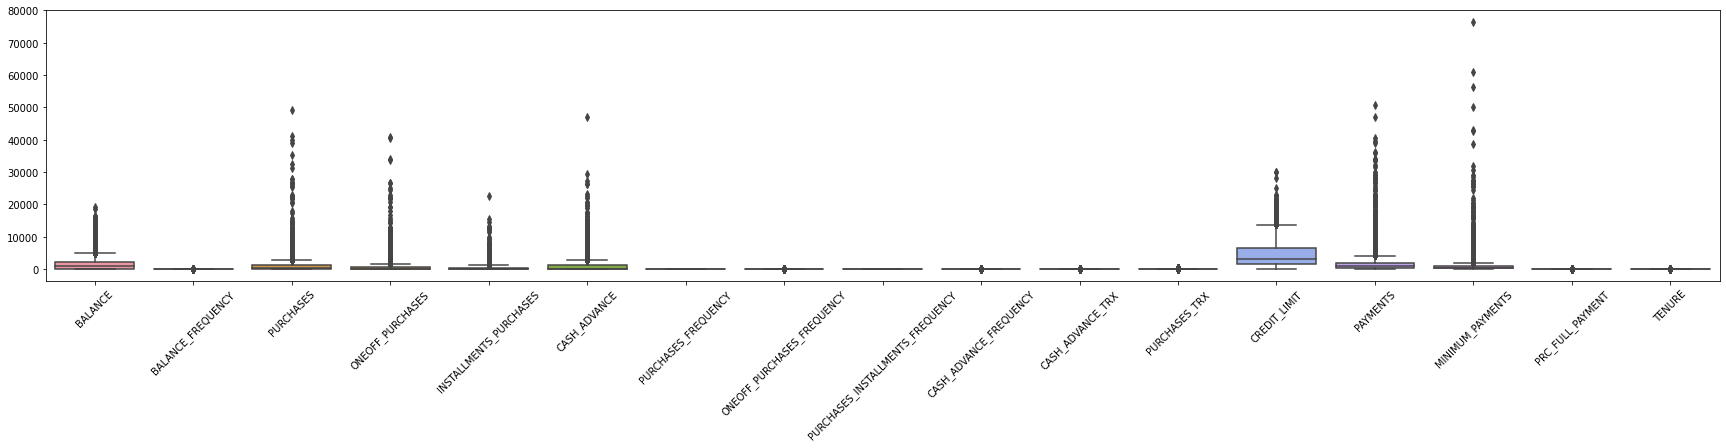

In [85]:
plt.figure(figsize=(30,5))
b = sns.boxplot(data=df)
b.set_xticklabels(b.get_xticklabels(),rotation=45)

3- Customer groups

# DBSCAN

In [86]:
# Applying normalization to run dbscan
# Why dbscan? Data has a lot of outliers data points and dbscan can deal well in thess cases

train_columns = ['CREDIT_LIMIT', 'PAYMENTS', 'BALANCE', 'PURCHASES']
train_columns =df._get_numeric_data().columns

# Getting metrics to normalize
clus_df_norm = StandardScaler().fit_transform(df[train_columns])
# Applying dbscan
db = DBSCAN(eps=0.3, min_samples=10).fit(clus_df_norm)
# Getting labels
labels = db.labels_
df['Clus_Db'] = labels

<AxesSubplot:>

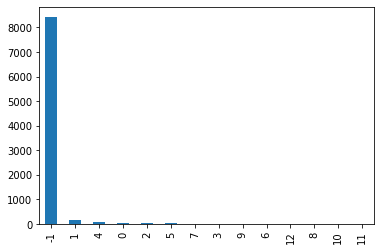

In [87]:
# Look at the number of groups that dbscan returned with eps = 0.3 and min_samples = 10
df['Clus_Db'].value_counts().plot.bar()

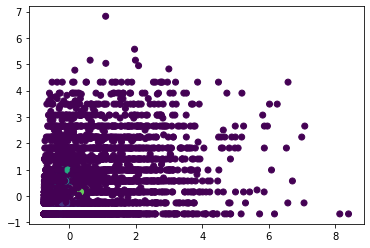

In [88]:
# Visualize in scatter plot
plt.scatter(clus_df_norm[:,0], clus_df_norm[:,9], c = labels)

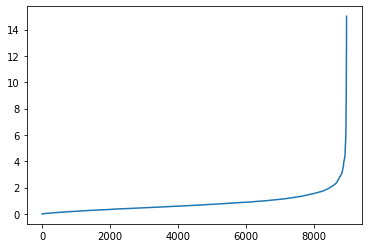

In [89]:
# The most of data points were included in one group. Find the optimal value to eps and samples will be helpfull
# to get better results

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(clus_df_norm)
distances, indices = nbrs.kneighbors(clus_df_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

<AxesSubplot:>

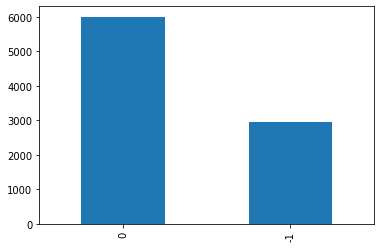

In [90]:
# Apply dbcan using values that were returned by NearestNeighbors
db = DBSCAN(eps=2, min_samples=500).fit(clus_df_norm)
# Getting labels
labels_op = db.labels_
df['Clus_Db_Optimized'] = labels_op
df['Clus_Db_Optimized'].value_counts().plot.bar()

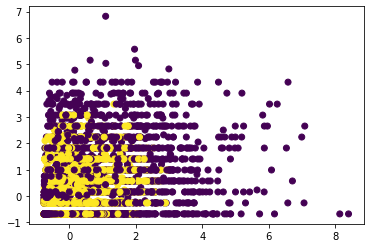

In [91]:
# Visualize in scatter plot
plt.scatter(clus_df_norm[:,0], clus_df_norm[:,9], c = labels_op)

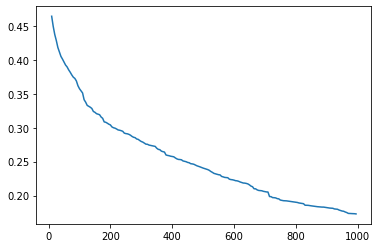

In [92]:
# Check the groups quality when the n_samples increases
dist = []
silh = []
for i in range(10,1000, 5):
    db = DBSCAN(eps=2, min_samples=i).fit(clus_df_norm)
    if len(set(db.labels_)) > 1:
        dist.append(i)
        silh.append(silhouette_score(clus_df_norm, db.labels_))
    
plt.figure()
plt.plot(dist,silh)
plt.show()

<AxesSubplot:>

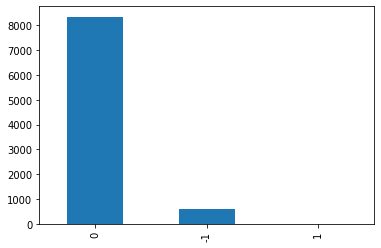

In [93]:
# Apply dbcan using values that were returned by NearestNeighbors
db = DBSCAN(eps=2, min_samples=5).fit(clus_df_norm)
# Getting labels
labels_op = db.labels_
df['Clus_Db_Optimized_silh'] = labels_op
df['Clus_Db_Optimized_silh'].value_counts().plot.bar()

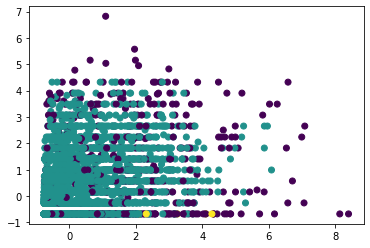

In [94]:
plt.scatter(clus_df_norm[:,0], clus_df_norm[:,9], c = labels_op)

# KMEANS

In [95]:
# Trying the best k
grupos = []
silhuet = []
distorsions = []
for i in range(2,20):
    true_k = i
    grupos.append(true_k)
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1).fit(clus_df_norm)
    silhuet.append(round(silhouette_score(clus_df_norm, model.labels_), 4))
    distorsions.append(np.average(np.min(cdist(clus_df_norm, model.cluster_centers_, 'euclidean'), axis=1)))

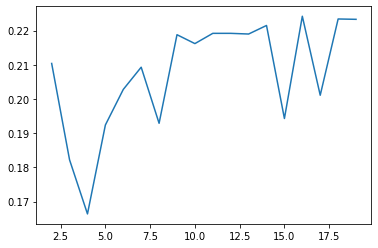

In [96]:
# Silhueta
plt.figure()
plt.plot(grupos, silhuet)
plt.show()

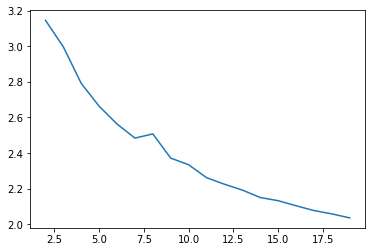

In [97]:
# Elbow
plt.figure()
plt.plot(grupos, distorsions)
plt.show()

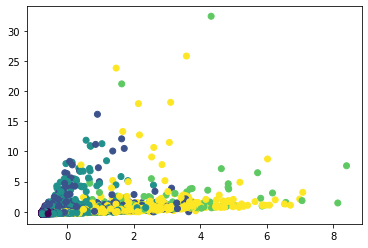

In [99]:
final_model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1).fit(clus_df_norm)
labels_kmeans = final_model.labels_
plt.scatter(clus_df_norm[:,0], clus_df_norm[:,14], c = labels_kmeans)


# Next Steps

- Check outliers to improve model metrics
- Try other model to compare results